In [1]:
import numpy as np
from tqdm import tqdm
import os
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
train = pd.read_csv('../qia2020/train.csv')
val = pd.read_csv('../qia2020/val.csv')

In [12]:
train.describe()

,FileID
count,44370.000000
mean,27344.099414
std,15894.320180
min,0.000000
25%,13742.250000
50%,26600.500000
75%,41126.750000
max,55349.000000


In [18]:
len(val)

5386

(array([6279., 5478.,    0., 6926.,    0., 5161., 6845.,    0., 6778.,
        6903.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

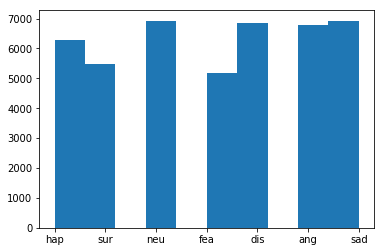

In [15]:
plt.hist(list(train['Emotion']))

(array([777., 694.,   0., 817.,   0., 643., 822.,   0., 815., 818.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

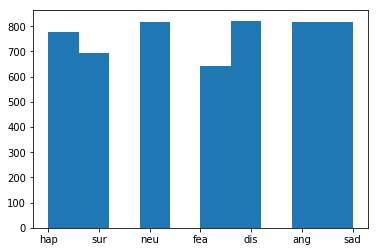

In [17]:
plt.hist(list(val['Emotion']))

100%|██████████| 44361/44361 [00:14<00:00, 3149.24it/s]


854


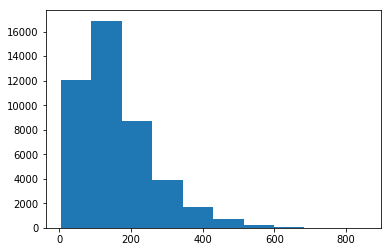

100%|██████████| 5386/5386 [00:01<00:00, 3124.26it/s]


731


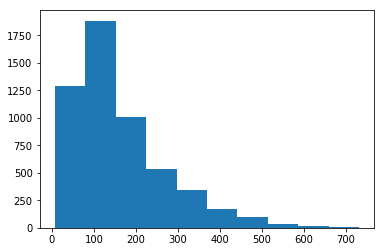

100%|██████████| 3720/3720 [00:04<00:00, 748.62it/s]


895


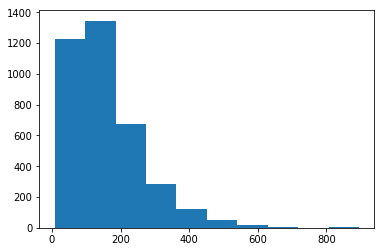

In [2]:
lens = []
for file in tqdm(os.listdir('../features/train/speech/')):
    lens.append(np.load('../features/train/speech/'+file).shape[-1])
plt.hist(lens)
print(np.max(lens))
plt.show()

lens = []
for file in tqdm(os.listdir('../features/val/speech/')):
    lens.append(np.load('../features/val/speech/'+file).shape[-1])
    
plt.hist(lens)
print(np.max(lens))
plt.show()

lens = []
for file in tqdm(os.listdir('../features/test/speech/')):
    lens.append(np.load('../features/test/speech/'+file).shape[-1])
    
plt.hist(lens)
print(np.max(lens))
plt.show()

100%|██████████| 44361/44361 [00:19<00:00, 2278.54it/s]


933


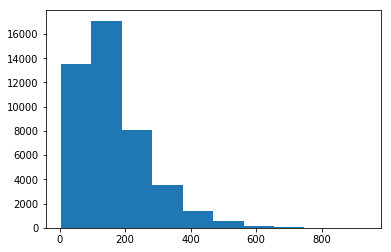

100%|██████████| 5386/5386 [00:02<00:00, 2244.01it/s]


731


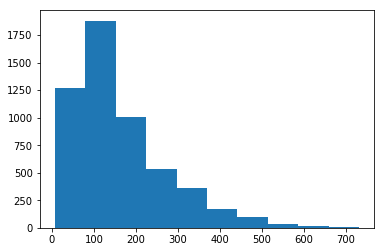

100%|██████████| 3720/3720 [00:01<00:00, 2606.48it/s]


895


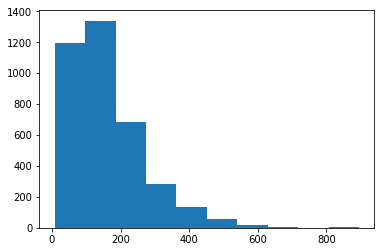

In [4]:
lens = []
for file in tqdm(os.listdir('../features/train/video_embedding/')):
    lens.append(np.load('../features/train/video_embedding/'+file).shape[0])
plt.hist(lens)
print(np.max(lens))
plt.show()

lens = []
for file in tqdm(os.listdir('../features/val/video_embedding/')):
    lens.append(np.load('../features/val/video_embedding/'+file).shape[0])
    
plt.hist(lens)
print(np.max(lens))
plt.show()

lens = []
for file in tqdm(os.listdir('../features/test/video_embedding/')):
    lens.append(np.load('../features/test/video_embedding/'+file).shape[0])
    
plt.hist(lens)
print(np.max(lens))
plt.show()

In [9]:
x = np.load('../features/train/text/'+file)

In [ ]:
lens = []
for file in tqdm(os.listdir('../features/train/text/')):
    lens.append(np.load('../features/train/text/'+file)['word_embed'].shape[0])
plt.hist(lens)
print(np.max(lens))
plt.show()

lens = []
for file in tqdm(os.listdir('../features/val/text/')):
    lens.append(np.load('../features/val/text/'+file)['word_embed'].shape[0])
    
plt.hist(lens)
print(np.max(lens))
plt.show()

lens = []
for file in tqdm(os.listdir('../features/test/text/')):
    lens.append(np.load('../features/test/text/'+file)['word_embed'].shape[0])
    
plt.hist(lens)
print(np.max(lens))
plt.show()

 72%|███████▏  | 31859/44370 [00:14<00:05, 2148.97it/s]

In [6]:
import albumentations

In [38]:
transform = albumentations.Compose(
    [
        albumentations.PadIfNeeded(min_height = 128, min_width = 600,border_mode = 0),
        albumentations.RandomCrop(height = 128, width = 400),
        albumentations.RandomBrightnessContrast(brightness_limit = 0.2,contrast_limit = 0.2, p = 1),
#                albumentations.Normalize(mean=mean, std=std,max_pixel_value = 1.0)
    ]
)

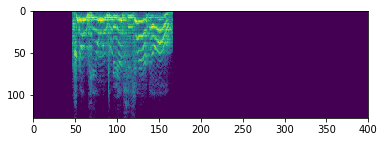

In [39]:
plt.imshow(transform(image = x[...,np.newaxis])['image'][...,-1])